In [1]:
from load_data_and_augmentations import *

In [2]:
from imbalanced_sampler_3 import MultilabelBalancedRandomSampler

In [3]:
from new_dataloader import *

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
tensor_transform = get_tensor_transform('Kinetics', False)
train_spat_transform = get_spatial_transform(0)
train_temp_transform = get_temporal_transform(16)
valid_spat_transform = get_spatial_transform(0)
valid_temp_transform = va.TemporalFit(size=16)

root_dir = '/media/scratch/astamoulakatos/nsea_video_jpegs/'
df = pd.read_csv('../important_csvs/more_balanced_dataset/small_stratified.csv')


In [6]:
bs = 20
df_train = get_df(df, 20, True, False, False)

In [7]:
df_train

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group
25,/media/scratch/astamoulakatos/nsea_video_jpegs...,84,0,1,0,0,0,bur,2,bur_0
26,/media/scratch/astamoulakatos/nsea_video_jpegs...,24,0,1,0,0,0,bur,2,bur_0
27,/media/scratch/astamoulakatos/nsea_video_jpegs...,72,0,1,0,0,0,bur,2,bur_0
29,/media/scratch/astamoulakatos/nsea_video_jpegs...,147,0,1,0,0,0,bur,2,bur_1
30,/media/scratch/astamoulakatos/nsea_video_jpegs...,58,0,1,0,0,0,bur,2,bur_0
...,...,...,...,...,...,...,...,...,...,...
416,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and,4,exp_and_0
417,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0
418,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0
419,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and,4,exp_and_0


In [8]:
df_train['middle_of_event'] = (df.number_of_frames/2-1).astype(int)

In [9]:
df_train

,event_path,number_of_frames,exposure,burial,field_joint,anode,free_span,label,fold,stratify_group,middle_of_event
25,/media/scratch/astamoulakatos/nsea_video_jpegs...,84,0,1,0,0,0,bur,2,bur_0,41
26,/media/scratch/astamoulakatos/nsea_video_jpegs...,24,0,1,0,0,0,bur,2,bur_0,11
27,/media/scratch/astamoulakatos/nsea_video_jpegs...,72,0,1,0,0,0,bur,2,bur_0,35
29,/media/scratch/astamoulakatos/nsea_video_jpegs...,147,0,1,0,0,0,bur,2,bur_1,72
30,/media/scratch/astamoulakatos/nsea_video_jpegs...,58,0,1,0,0,0,bur,2,bur_0,28
...,...,...,...,...,...,...,...,...,...,...,...
416,/media/scratch/astamoulakatos/nsea_video_jpegs...,29,1,0,0,1,0,exp_and,4,exp_and_0,13
417,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0,16
418,/media/scratch/astamoulakatos/nsea_video_jpegs...,35,1,0,0,1,0,exp_and,4,exp_and_0,16
419,/media/scratch/astamoulakatos/nsea_video_jpegs...,55,1,0,0,1,0,exp_and,4,exp_and_0,26


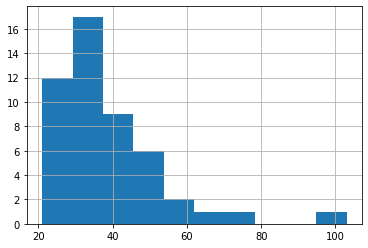

In [10]:
df_train[df_train.label=='exp_and'].number_of_frames.hist()

In [11]:
middle = np.array(df_train.middle_of_event)

In [12]:
len(middle)

252

In [13]:
class_image_paths, end_idx, idx_label = get_indices(df_train, root_dir)

In [14]:
end_idx

tensor([    0,    83,   106,   177,   323,   380,   440,   466,   702,   746,
          876,   965,  1132,  1296,  1323,  1407,  1631,  1662,  1773,  2127,
         2199,  2312,  2331,  2379,  2423,  2600,  2625,  2659,  2951,  3082,
         3135,  3411,  3548,  3601,  3696,  3790,  4101,  4132,  4402,  4512,
         4711,  4870,  5078,  5246,  5375,  5413,  5479,  5645,  5694,  5738,
         5855,  5909,  6056,  6082,  6127,  6204,  6303,  6349,  6461,  6491,
         6564,  6707,  6751,  6873,  6945,  6973,  7094,  7210,  7364,  7394,
         7454,  7568,  7638,  7777,  7820,  7899,  7986,  8019,  8104,  8313,
         8360,  8396,  8453,  8508,  8684,  8736,  8841,  8980,  9002,  9084,
         9144,  9187,  9343,  9374,  9414,  9509,  9628,  9675,  9755,  9790,
        10020, 10045, 10135, 10214, 10243, 10265, 10359, 10388, 10419, 10475,
        10501, 10608, 10656, 10801, 10905, 10935, 11017, 11061, 11140, 11217,
        11261, 11320, 11660, 11783, 11880, 11943, 12115, 12282, 

In [15]:
idx_label

['bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'bur',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_fs',
 'exp_

In [16]:
len(class_image_paths)

17436

In [17]:
len(end_idx)

253

# 253 events in training set

In [21]:
def get_final_indices(idx_label, end_idx, window, seq_length=20, per_label=False):
    indices = []
    for i in range(len(end_idx) - 1):
        start = end_idx[i]
        end = end_idx[i + 1] - seq_length
        if start > end:
            pass
        else:
            if window=='nei':
                ind = torch.arange(start, end, seq_length)
                indices.append(ind)
            if window=='sli':
                ind = torch.arange(start, end)
                indices.append(ind)
    return indices

In [22]:
seq_length = 20

In [23]:
indices = get_final_indices(idx_label, end_idx, 'sli')

In [24]:
start = 0
end = 100
ind = torch.arange(start,end,20)
ind

tensor([ 0, 20, 40, 60, 80])

In [25]:
indices

[tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62]),
 tensor([83, 84, 85]),
 tensor([106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
         120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
         148, 149, 150, 151, 152, 153, 154, 155, 156]),
 tensor([177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
         191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
         205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
         219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
         233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,

In [26]:
indices = get_final_indices(idx_label, end_idx, 'nei')

In [27]:
indices

[tensor([ 0, 20, 40, 60]),
 tensor([83]),
 tensor([106, 126, 146]),
 tensor([177, 197, 217, 237, 257, 277, 297]),
 tensor([323, 343]),
 tensor([380, 400]),
 tensor([440]),
 tensor([466, 486, 506, 526, 546, 566, 586, 606, 626, 646, 666]),
 tensor([702, 722]),
 tensor([746, 766, 786, 806, 826, 846]),
 tensor([876, 896, 916, 936]),
 tensor([ 965,  985, 1005, 1025, 1045, 1065, 1085, 1105]),
 tensor([1132, 1152, 1172, 1192, 1212, 1232, 1252, 1272]),
 tensor([1296]),
 tensor([1323, 1343, 1363, 1383]),
 tensor([1407, 1427, 1447, 1467, 1487, 1507, 1527, 1547, 1567, 1587, 1607]),
 tensor([1631]),
 tensor([1662, 1682, 1702, 1722, 1742]),
 tensor([1773, 1793, 1813, 1833, 1853, 1873, 1893, 1913, 1933, 1953, 1973, 1993,
         2013, 2033, 2053, 2073, 2093]),
 tensor([2127, 2147, 2167]),
 tensor([2199, 2219, 2239, 2259, 2279]),
 tensor([2331, 2351]),
 tensor([2379, 2399]),
 tensor([2423, 2443, 2463, 2483, 2503, 2523, 2543, 2563]),
 tensor([2600]),
 tensor([2625]),
 tensor([2659, 2679, 2699, 2719, 

In [21]:
seq_length = 20
indices = []
weight = []
distance = []
for i in range(len(end_idx) - 1):
    start = end_idx[i]
    end = end_idx[i + 1] - seq_length
    mid = (end - start)/2 + start
    #print(mid)
    if start > end:
        pass
    else:
        ind = torch.arange(start, end)
        indices.append(ind)
        dist = abs(torch.arange(start, end)-mid)
        distance.append(dist)
        wei = (mid-dist)/mid.float()
        weight.append(wei)
        

In [107]:
indices = torch.cat(indices)

In [32]:
def generate_weight(length=40, lead_in=0.1, lead_out=0.1, min_weight=0.5):
    return np.concatenate([
        np.linspace(min_weight, 1, int(length*lead_in)),
        np.ones(int((1-lead_in-lead_out)*length)),
        np.linspace(1, min_weight, int(length*lead_out))
    ])

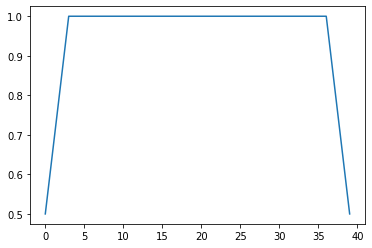

In [34]:
plt.plot(generate_weight(40))

In [108]:
indices

tensor([    0,     1,     2,  ..., 17413, 17414, 17415])

In [109]:
len(indices)

12397

In [13]:
indices = indices[torch.randperm(len(indices))]

In [14]:
indices

tensor([10580,  1259, 12348,  ...,  7416,   491,  2979])

In [16]:
labels = []
for i in class_image_paths:
    labels.append(i[2])
labels = np.array(labels)


In [18]:
len(labels)

17436

In [ ]:
train_sampler = MultilabelBalancedRandomSampler(
    labels, indices, class_choice="least_sampled"
)